# Deep Learning Methods for Medical Image Analysis (CM2003)

# Laboratory Assignment 3: Part 3 - Data Augmentation

Lab Group 8:
- Gnana Spandana Akumalla
- Patrik Svensson
- Serkan Arda Yilal

In [1]:
import os
import numpy as np
import pandas as pd
from random import shuffle
from skimage.io import imread
from skimage.transform import resize
from keras.utils.np_utils import to_categorical   
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout, BatchNormalization, SpatialDropout2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt

#In case you would like to import the functions from python files containing the functions, import following lines

from Models import lenet_model, alexnet_model, vgg16_model
from DataLoader import gen_labels_multiclass, get_data_multiclass, get_data_arrays, get_train_test_arrays_multiclass


In [2]:
def model_trainer(learning_rate, epochs, n_base, batch_size, x_train, y_train, x_test, y_test,
                  dropout = None, n_class = 2, first2_dense = [64, 64],
                  batch_norm = False, s_dropout = None,
                  loss = "BinaryCrossentropy", optimizer = "Adam",model_type = "alexnet", verbose = 1):
    
#Function for training model and returning classifier history

#------INPUTS------
#learning_rate = value for learning rate
#epoch = number of epochs
#n_base: feature map size
#batch_size = batch size to be used in training
#x_train: training data
#y_train: training labels
#x_test: test data
#y_test: test labels
#dropout = float value to be used in dropout. Default is None so it is inactive. Enter a float value to activate it.
#n_class = number of classes to be predicted. Defines the number of neurons in last dense layer. if 2 classes exist, 1 neuron with sigmoid is used.
#first2_dense = number of neurons to be used in first and second dense layer.
#batch_norm = boolean value for activating batch normalization
#s_droput = float value to be used in spatial dropout. Default is None so it is inactive. Enter a float value to activate it.
#loss = type of loss.
#optimizer = type of optimizer. Can be Adam, SGD, RMSprop
#model_type = parameter for deciding which model should be trained. The options are lenet, alexnet, and rgg16.
#verbose = shows the details of the training. 2 or more will give more details while 1 give no details.

#------OUTPUTS------
#clf_hist = classifier history during training.
    
    if n_class == 2:
        metrics = ["binary_accuracy"]
    elif n_class > 2:
        metrics = ["sparse_categorical_accuracy"]
    
    if model_type == "lenet":  
        clf = lenet_model(img_w, img_h, 1, n_base, n_class = n_class)
    elif model_type == "alexnet":
        clf = alexnet_model(img_w, img_h, 1, n_base, dropout = dropout, n_class = n_class, first2_dense = first2_dense,
                  batch_norm = batch_norm, s_dropout = s_dropout)
    elif model_type == "vgg16":
        clf = vgg16_model(img_w, img_h, 1, n_base, dropout = dropout, first2_dense = first2_dense, n_class = n_class)
        
        
    if optimizer == "Adam":
        
        clf.compile(loss=loss, optimizer = Adam(learning_rate = learning_rate), metrics=metrics) 
        clf_hist = clf.fit(x_train, y_train, shuffle=True, epochs = epochs, batch_size=batch_size, verbose=verbose, 
                       validation_data=(x_test, y_test))
        
    elif optimizer == "SGD":
        
        clf.compile(loss=loss, optimizer = SGD(learning_rate = learning_rate), metrics=metrics) 
        clf_hist = clf.fit(x_train, y_train, shuffle=True, epochs = epochs, batch_size=batch_size, verbose=verbose, 
                       validation_data=(x_test, y_test))    
    
    elif optimizer == "RMSprop":
        
        clf.compile(loss=loss, optimizer = RMSprop(learning_rate = learning_rate), metrics=metrics) 
        clf_hist = clf.fit(x_train, y_train, shuffle=True, epochs = epochs, batch_size=batch_size, verbose=verbose, 
                       validation_data=(x_test, y_test))    
    

    return clf_hist

def generator_model_trainer(learning_rate, epochs, n_base, train_generator, val_generator,
                  dropout = None, n_class = 2, first2_dense = [64, 64],
                  batch_norm = False, s_dropout = None,
                  loss = "BinaryCrossentropy", optimizer = "Adam",model_type = "alexnet", verbose = 1):
    
#Function for training model and returning classifier history

#------INPUTS------
#learning_rate = value for learning rate
#epoch = number of epochs
#n_base: feature map size

#train_generator: generator for training data
#val_generator: generator for validation data
#dropout = float value to be used in dropout. Default is None so it is inactive. Enter a float value to activate it.
#n_class = number of classes to be predicted. Defines the number of neurons in last dense layer. if 2 classes exist, 1 neuron with sigmoid is used.
#first2_dense = number of neurons to be used in first and second dense layer.
#batch_norm = boolean value for activating batch normalization
#s_droput = float value to be used in spatial dropout. Default is None so it is inactive. Enter a float value to activate it.
#loss = type of loss.
#optimizer = type of optimizer. Can be Adam, SGD, RMSprop
#model_type = parameter for deciding which model should be trained. The options are lenet, alexnet, and rgg16.
#verbose = shows the details of the training. 2 or more will give more details while 1 give no details.

#------OUTPUTS------
#clf_hist = classifier history during training.
    
    if n_class == 2:
        metrics = ["binary_accuracy"]
    elif n_class > 2:
        metrics = ["sparse_categorical_accuracy"]
    
    if model_type == "lenet":  
        clf = lenet_model(img_w, img_h, 1, n_base, n_class = n_class)
    elif model_type == "alexnet":
        clf = alexnet_model(img_w, img_h, 1, n_base, dropout = dropout, n_class = n_class, first2_dense = first2_dense,
                  batch_norm = batch_norm, s_dropout = s_dropout)
    elif model_type == "vgg16":
        clf = vgg16_model(img_w, img_h, 1, n_base, dropout = dropout, first2_dense = first2_dense, n_class = n_class)
        
    
    
    step_size_train = train_generator.n//train_generator.batch_size
    step_size_val = val_generator.n//val_generator.batch_size
    if optimizer == "Adam":
        
        clf.compile(loss=loss, optimizer = Adam(learning_rate = learning_rate), metrics=metrics) 
        
        
        clf_hist = clf.fit_generator(generator = train_generator,steps_per_epoch = step_size_train,
                                     epochs = epochs, verbose=verbose, 
                                       validation_data=val_generator, validation_steps=step_size_val)
        
    elif optimizer == "SGD":
        
        clf.compile(loss=loss, optimizer = SGD(learning_rate = learning_rate), metrics=metrics) 
        clf_hist = clf.fit_generator(generator = train_generator,steps_per_epoch = step_size_train,
                                     epochs = epochs, verbose=verbose, 
                                       validation_data=val_generator, validation_steps=step_size_val)    
    
    elif optimizer == "RMSprop":
        
        clf.compile(loss=loss, optimizer = RMSprop(learning_rate = learning_rate), metrics=metrics) 
        clf_hist = clf.fit_generator(generator = train_generator,steps_per_epoch = step_size_train,
                                     epochs = epochs, verbose=verbose, 
                                       validation_data=val_generator, validation_steps=step_size_val)  
    

    return clf_hist

def loss_accuracy_plot(clf_hist, string , n_class = 2):

#Function for plotting the results of loss and accuracy

#------INPUTS------
#clf_hist = classifier history during training.
#string = title for the plot.
#n_class = number of class in the classification task. Based on the value, the accuracy type changes.


    if n_class == 2:
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))

        #Plot for loss values
        axs[0].set_title("Learning curve")
        axs[0].plot(clf_hist.history["loss"], label="loss")
        axs[0].plot(clf_hist.history["val_loss"], label="val_loss")
        axs[0].plot( np.argmin(clf_hist.history["val_loss"]),
                    np.min(clf_hist.history["val_loss"]),
                    marker="x", color="r", label="best model")

        axs[0].set_xlabel("Epochs")
        axs[0].set_ylabel("Loss Value")
        axs[0].legend()

        fig.suptitle(string, fontsize=13)

        #Plot for accuracy values
        axs[1].set_title("Learning curve")
        axs[1].plot(clf_hist.history["binary_accuracy"], label="accuracy")
        axs[1].plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
        axs[1].plot( np.argmax(clf_hist.history["val_binary_accuracy"]),
                    np.max(clf_hist.history["val_binary_accuracy"]),
                    marker="x", color="r", label="best model")

        axs[1].set_xlabel("Epochs")
        axs[1].set_ylabel("Accuracy")
        axs[1].legend()
        plt.show()
    
    elif n_class > 2:
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))

        #Plot for loss values
        axs[0].set_title("Learning curve")
        axs[0].plot(clf_hist.history["loss"], label="loss")
        axs[0].plot(clf_hist.history["val_loss"], label="val_loss")
        axs[0].plot( np.argmin(clf_hist.history["val_loss"]),
                    np.min(clf_hist.history["val_loss"]),
                    marker="x", color="r", label="best model")

        axs[0].set_xlabel("Epochs")
        axs[0].set_ylabel("Loss Value")
        axs[0].legend()

        fig.suptitle(string, fontsize=13)

        #Plot for accuracy values
        axs[1].set_title("Learning curve")
        axs[1].plot(clf_hist.history["sparse_categorical_accuracy"], label="accuracy")
        axs[1].plot(clf_hist.history["val_sparse_categorical_accuracy"], label="val_accuracy")
        axs[1].plot( np.argmax(clf_hist.history["val_sparse_categorical_accuracy"]),
                    np.max(clf_hist.history["val_sparse_categorical_accuracy"]),
                    marker="x", color="r", label="best model")

        axs[1].set_xlabel("Epochs")
        axs[1].set_ylabel("Accuracy")
        axs[1].legend()
        plt.show()
    
  

### Task 7a)

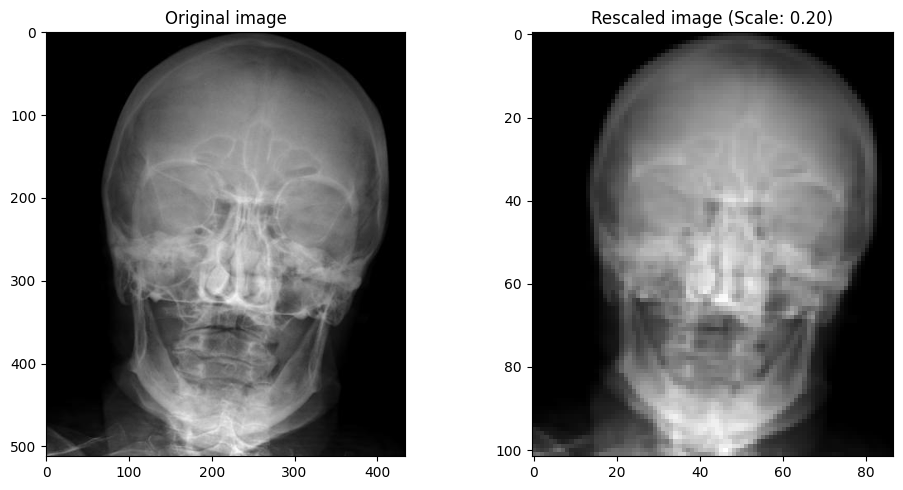

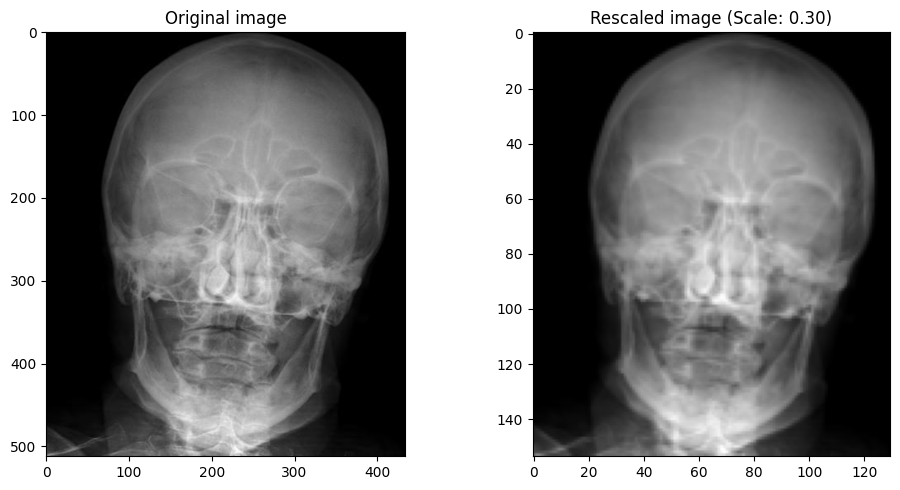

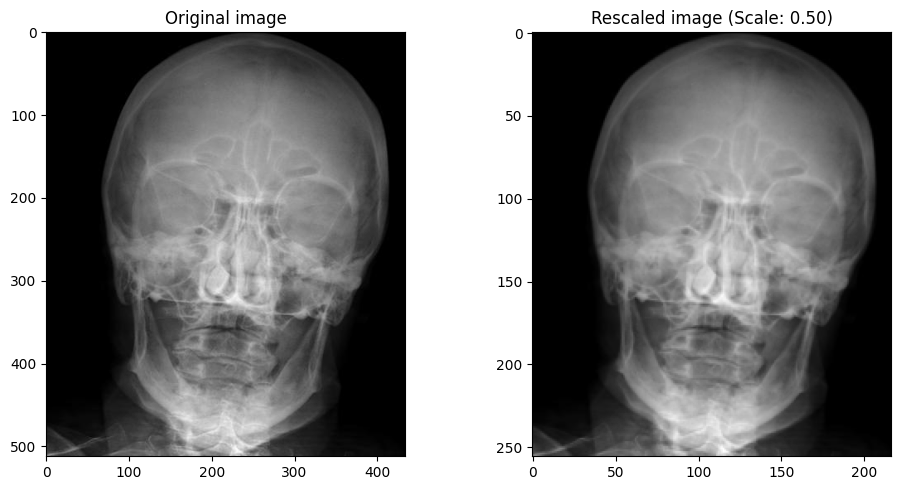

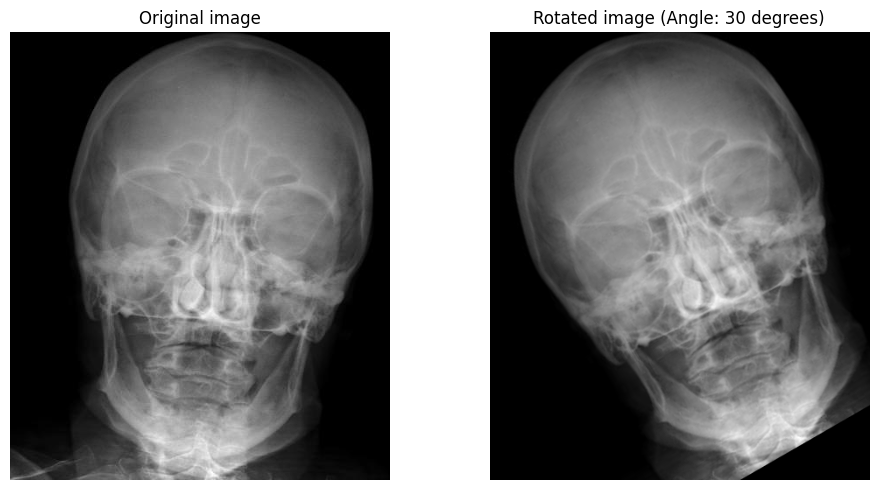

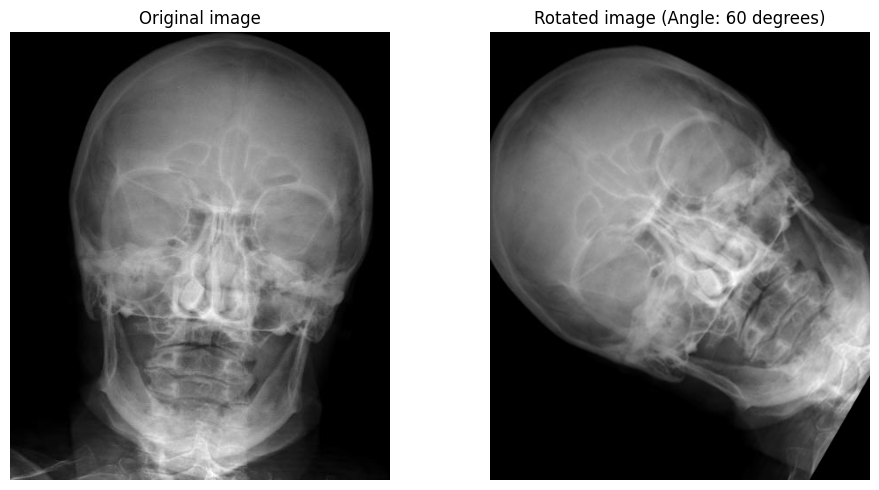

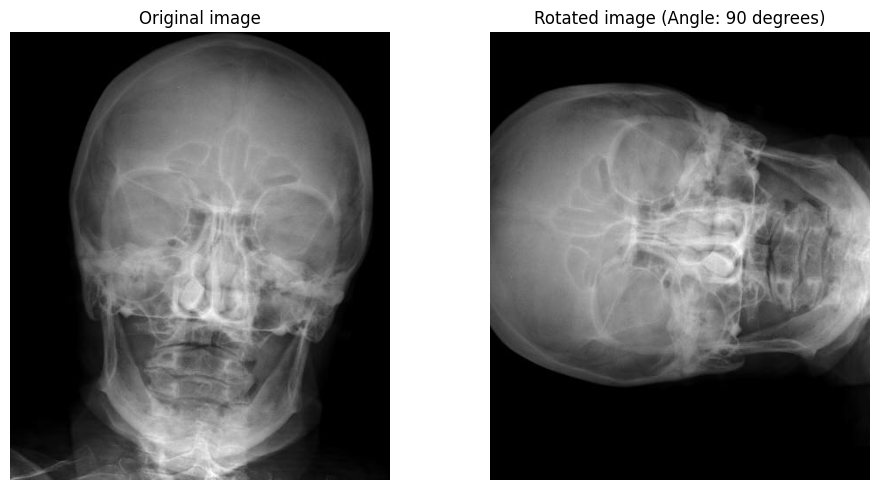

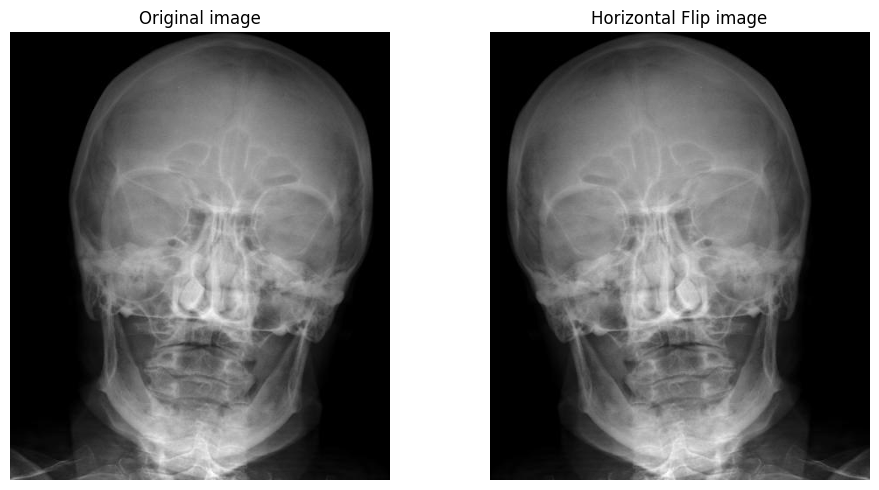

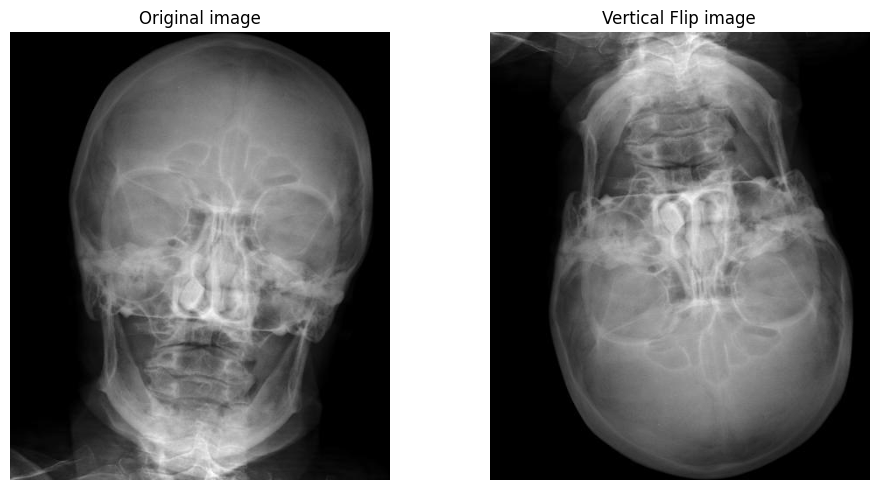

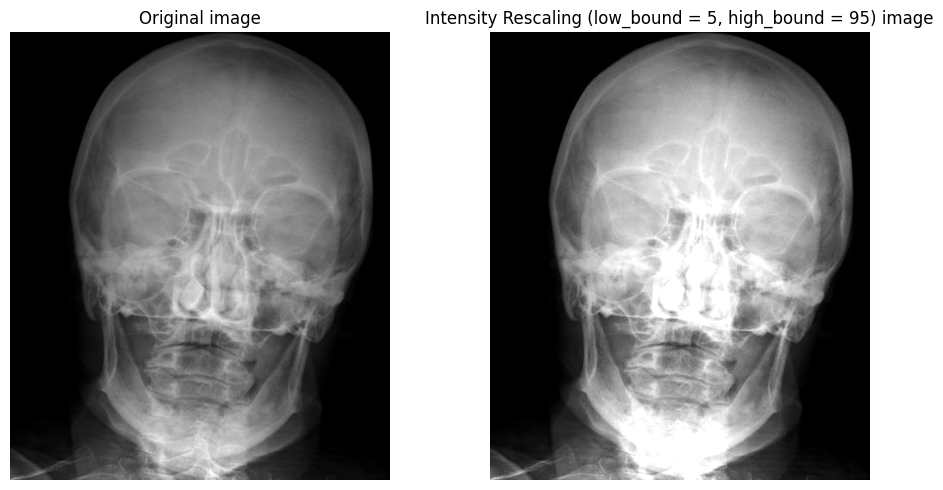

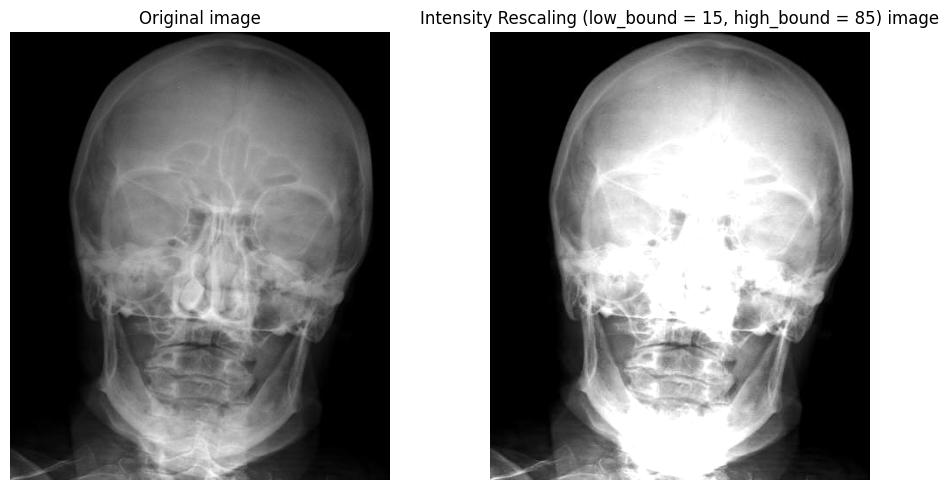

In [16]:
import numpy as np
from skimage.io import imread
from skimage.transform import rescale
from skimage.transform import rotate
from skimage import exposure
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sample_dir = 'Data/DL_course/Lab1/X_ray/train/C4_4662.jpg'
img = imread(sample_dir)
row, col = img.shape


def show_paired(Original, Transform, Operation, scale_factor=None, angle=None):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))  # Added figsize
    ax = axes.ravel()
    ax[0].imshow(Original, cmap='gray')
    ax[0].set_title("Original image")
    
    if Operation == "Rescaled" and scale_factor is not None:
        ax[1].imshow(Transform, cmap='gray')
        ax[1].set_title(f"Rescaled image (Scale: {scale_factor:.2f})")
    elif Operation == "Rotated" and angle is not None:
        ax[1].imshow(Transform, cmap='gray')
        ax[1].set_title(f"Rotated image (Angle: {angle} degrees)")
    else:
        ax[1].imshow(Transform, cmap='gray')
        ax[1].set_title(Operation + " image")
    if Operation == "Rescaled":
        ax[0].set_xlim(0, col)
        ax[0].set_ylim(row, 0)
    else:
        ax[0].axis('off')
        ax[1].axis('off')
    plt.tight_layout()  # Adjusted the indentation for plt.tight_layout()

# Scaling
scale_factors = [0.2, 0.3, 0.5]  # Use a list of scale factors
for scale_factor in scale_factors:
    image_rescaled = rescale(img, scale_factor)
    show_paired(img, image_rescaled, "Rescaled", scale_factor=scale_factor)

# Rotation
angles = [30, 60, 90]  # Use a list of angles
for angle in angles:
    image_rotated = rotate(img, angle)
    show_paired(img, image_rotated, "Rotated", angle=angle)

# Horizontal Flip
horizontal_flip = img[:, ::-1]
show_paired(img, horizontal_flip, 'Horizontal Flip')

# Vertical Flip
vertical_flip = img[::-1, :]
show_paired(img, vertical_flip, 'Vertical Flip')

# Intensity rescaling
low_bound_list = [5, 15]
high_bound_list = [95, 85]

for low_bound, high_bound in zip(low_bound_list,high_bound_list):
    min_val, max_val = np.percentile(img, (low_bound, high_bound))
    better_contrast = exposure.rescale_intensity(img, in_range=(min_val, max_val))
    show_paired(img, better_contrast, 'Intensity Rescaling (low_bound = {}, high_bound = {})'.format(low_bound, high_bound))

plt.show()  # Added this line to display the plots



### Task 7b)

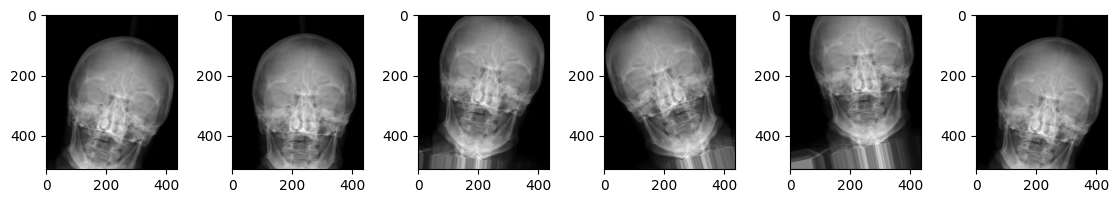

In [34]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img

Sample = 'Data/DL_course/Lab1/X_ray/train/C4_4662.jpg'
Img = imread(Sample)
Img = np.expand_dims(Img, axis = 2)
Img = np.expand_dims(Img, axis = 0)


count = 5
my_gen = ImageDataGenerator(rotation_range = 20,
                            width_shift_range = 0.2,
                            horizontal_flip = True)

fix, ax = plt.subplots(1,count+1, figsize=(14,2))
images_flow = my_gen.flow(Img, batch_size=1)

for i, new_images in enumerate(images_flow):
    new_image = array_to_img(new_images[0], scale=True)
    ax[i].imshow(new_image,cmap="gray")
    if i >= count:
        break
plt.show() 

### Task 8

In [4]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img

train_dir = 'Data/DL_course/Lab2/Skin/train/'
val_dir = 'Data/DL_course/Lab2/Skin/validation/'




learning_rate = 0.00001
epochs = 80
batch_size = 8
n_base = 64
dropout = 0.4
n_class = 2
first2_dense = [128, 64] 
batch_norm = True
s_dropout = None
loss = "BinaryCrossentropy"
optimizer = "Adam"
model_type = "alexnet"
img_w, img_h = 128, 128

train_datagen = ImageDataGenerator(rotation_range = 10,
                            width_shift_range = 0.1,
                            height_shift_range=0.1,
                            rescale = 1./255,
                            horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (img_w, img_h), color_mode = "grayscale",
                                                    batch_size=batch_size,
                                                    classes = ["Mel", "Nev"],
                                                   class_mode = "binary")

val_datagen = ImageDataGenerator(rescale = 1./255)
val_generator = val_datagen.flow_from_directory(val_dir, target_size = (img_w, img_h), color_mode = "grayscale",
                                                   batch_size=batch_size,
                                                classes = ["Mel", "Nev"],class_mode = "binary")



Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 128)      5

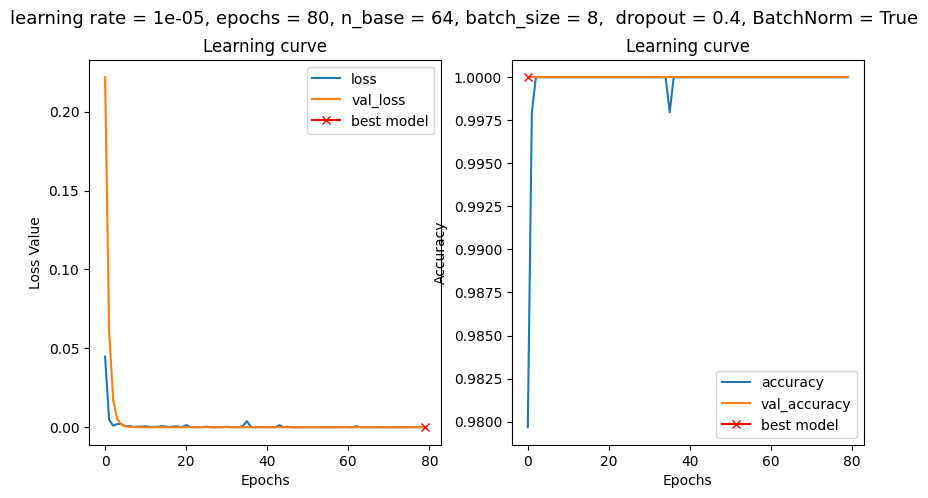

In [5]:
clf_hist_alexnet = generator_model_trainer(learning_rate = learning_rate, epochs = epochs, 
                         train_generator = train_generator, val_generator = val_generator,
                             n_base = n_base,dropout = dropout, batch_norm = batch_norm,
                             s_dropout = s_dropout, loss = loss, optimizer = optimizer, model_type = model_type, 
                             first2_dense = first2_dense,verbose = 0)



#plotting graph of loss and accuracy for corresponding settings
loss_accuracy_plot(clf_hist_alexnet, "learning rate = {}, epochs = {}, n_base = {}, batch_size = {},  dropout = {}, BatchNorm = {}".format(learning_rate,
                                                                                                            epochs,
                                                                                                            n_base,batch_size,
                                                                                                            dropout, batch_norm))


### Task 9

In [6]:
train_dir_bone = 'Data/DL_course/Lab2/Bone/train/'
val_dir_bone = 'Data/DL_course/Lab2/Bone/validation/'

train_datagen = ImageDataGenerator(rotation_range = 10,
                            width_shift_range = 0.1,
                            height_shift_range=0.1,
                            rescale = 1./255,
                            horizontal_flip = True)


learning_rate = 0.00001
epochs = 80
batch_size = 8
n_base = 64
dropout = 0.4
n_class = 2
first2_dense = [64, 64] 
batch_norm = True
s_dropout = None
loss = "BinaryCrossentropy"
optimizer = "Adam"
model_type = "vgg16"
img_w, img_h = 128, 128

#["AFF", "NFF"]
train_generator_bone = train_datagen.flow_from_directory(train_dir_bone, target_size = (img_w, img_h), color_mode = "grayscale",
                                                    batch_size=batch_size,
                                                    classes = ["AFF", "NFF"],
                                                   class_mode = "binary")

val_datagen = ImageDataGenerator(rescale = 1./255)
val_generator_bone = val_datagen.flow_from_directory(val_dir_bone, target_size = (img_w, img_h), color_mode = "grayscale",
                                                   batch_size=batch_size,
                                                classes = ["AFF", "NFF"],class_mode = "binary")

Found 1112 images belonging to 2 classes.
Found 96 images belonging to 2 classes.


Repeating Task 8 for VGG for skin data set

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 128, 128, 64)      640       
                                                                 
 activation_8 (Activation)   (None, 128, 128, 64)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 activation_9 (Activation)   (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 128)       73856     
                                                      

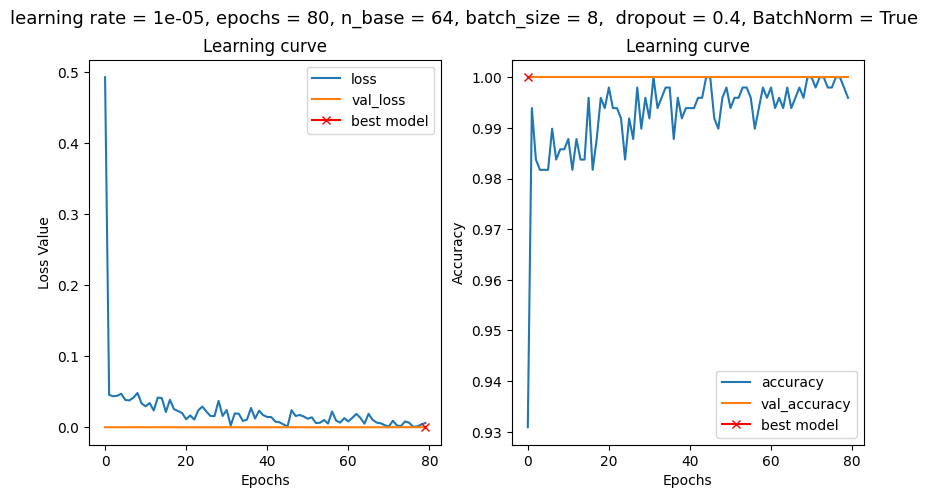

In [7]:
clf_hist_vgg16 = generator_model_trainer(learning_rate = learning_rate, epochs = epochs, 
                         train_generator = train_generator, val_generator = val_generator,
                             n_base = n_base,dropout = dropout, batch_norm = batch_norm,
                             s_dropout = s_dropout, loss = loss, optimizer = optimizer, model_type = model_type, 
                             first2_dense = first2_dense,verbose = 0)



#plotting graph of loss and accuracy for corresponding settings
loss_accuracy_plot(clf_hist_vgg16, "learning rate = {}, epochs = {}, n_base = {}, batch_size = {},  dropout = {}, BatchNorm = {}".format(learning_rate,
                                                                                                            epochs,
                                                                                                            n_base,batch_size,
                                                                                                            dropout, batch_norm))


Repeating Task 8 for VGG for bone data set

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 128, 128, 64)      640       
                                                                 
 activation_48 (Activation)  (None, 128, 128, 64)      0         
                                                                 
 conv2d_37 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 activation_49 (Activation)  (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 64, 64, 128)       73856     
                                                      

<ipython-input-2-47970fce0e51>:107: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  clf_hist = clf.fit_generator(generator = train_generator,steps_per_epoch = step_size_train,


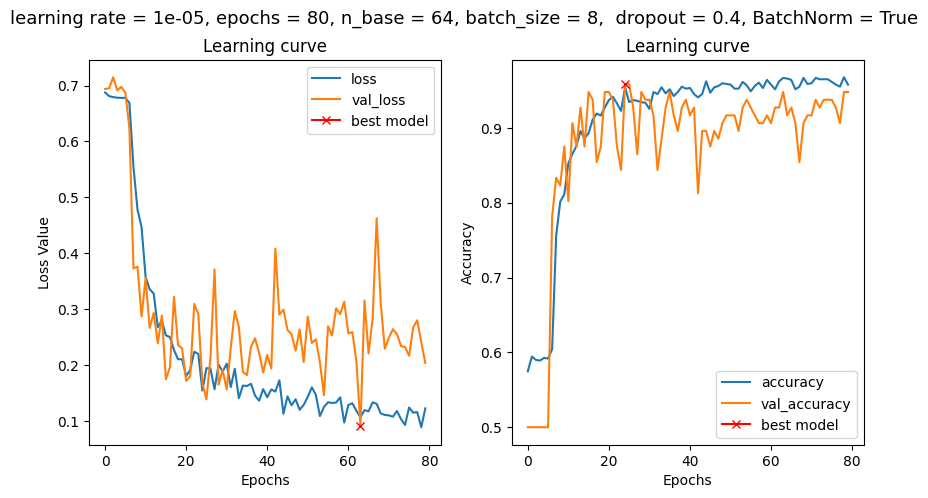

In [12]:
clf_hist = generator_model_trainer(learning_rate = learning_rate, epochs = epochs, 
                         train_generator = train_generator_bone, val_generator = val_generator_bone,
                             n_base = n_base,dropout = dropout, batch_norm = batch_norm,
                             s_dropout = s_dropout, loss = loss, optimizer = optimizer, model_type = model_type, 
                             first2_dense = first2_dense,verbose = 0)



#plotting graph of loss and accuracy for corresponding settings
loss_accuracy_plot(clf_hist, "learning rate = {}, epochs = {}, n_base = {}, batch_size = {},  dropout = {}, BatchNorm = {}".format(learning_rate,
                                                                                                            epochs,
                                                                                                            n_base,batch_size,
                                                                                                            dropout, batch_norm))
